# Plotting Logic

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

n_obs_per_round = 18432
scores = 542

def load_rewards(csv_file):

    df = pd.read_csv(csv_file)
    rewards = df['Reward'].dropna().tolist()
    while len(rewards) < 542:
        if rewards:
            rewards.append(rewards[-1])
    return rewards

def calculate_rolling_average(rewards, window_size):
    rewards_series = pd.Series(rewards)
    rolling_avg = rewards_series.rolling(window=window_size).mean().tolist()
    return rolling_avg

def find_best_run(csv_files):
    best_run = None
    best_reward = float('-inf')
    best_rewards = []

    for csv_file in csv_files:
        rewards = load_rewards(csv_file)
        if rewards[-1] > best_reward:
            best_reward = rewards[-1]
            best_run = csv_file
            best_rewards = rewards

    return best_run, best_rewards

def calculate_average_and_std_rewards(csv_files):
    all_rewards = []

    for csv_file in csv_files:
        rewards = load_rewards(csv_file)
        all_rewards.append(rewards)

    all_rewards_df = pd.DataFrame(all_rewards).T
    average_rewards = all_rewards_df.mean(axis=1).tolist()
    std_rewards = all_rewards_df.std(axis=1).tolist()

    return average_rewards, std_rewards

def plot_comparative_rewards_with_variance(csv_files_set1=None,
                                           csv_files_set2=None,
                                           csv_files_set3=None,
                                           csv_files_set4=None,
                                           csv_files_set5=None,
                                           csv_files_set6=None,
                                           label1=None,
                                           label2=None,
                                           label3=None,
                                           label4=None,
                                           label5=None,
                                           label6=None,
                                           enable_variance_in_plot=True,
                                           title=None,
                                           legend_title=None,
                                           window_size=50,
                                           use_best_run=False):

    if csv_files_set1:
        train_step_interval = [i * n_obs_per_round for i in range(1, len(load_rewards(csv_files_set1[0])) + 1)]
    elif csv_files_set2:
        train_step_interval = [i * n_obs_per_round for i in range(1, len(load_rewards(csv_files_set2[0])) + 1)]
    elif csv_files_set3:
        train_step_interval = [i * n_obs_per_round for i in range(1, len(load_rewards(csv_files_set3[0])) + 1)]
    elif csv_files_set4:
        train_step_interval = [i * n_obs_per_round for i in range(1, len(load_rewards(csv_files_set4[0])) + 1)]
    elif csv_files_set5:
        train_step_interval = [i * n_obs_per_round for i in range(1, len(load_rewards(csv_files_set5[0])) + 1)]
    elif csv_files_set6:
        train_step_interval = [i * n_obs_per_round for i in range(1, len(load_rewards(csv_files_set6[0])) + 1)]


    def process_csv_set(csv_files_set, label, color):
      if use_best_run:
          _, rewards = find_best_run(csv_files_set)
          avg_rewards = rewards
          std_rewards = [0] * len(rewards)
      else:
          avg_rewards, std_rewards = calculate_average_and_std_rewards(csv_files_set)


      rolling_avg = calculate_rolling_average(avg_rewards, window_size)
      rolling_std = calculate_rolling_average(std_rewards, window_size)

      min_length = min(len(rolling_avg), len(rolling_std), len(train_step_interval))

      rolling_avg = rolling_avg[:min_length]
      rolling_std = rolling_std[:min_length]
      adjusted_train_step_interval = train_step_interval[:min_length]

      #print(f"Final adjusted length: {min_length}")
      #print(f"Length of rolling_avg: {len(rolling_avg)}")
      #print(f"Length of rolling_std: {len(rolling_std)}")
      #print(f"Adjusted length of train_step_interval: {len(adjusted_train_step_interval)}")

      sns.lineplot(x=adjusted_train_step_interval, y=rolling_avg, label=label, color=color, linewidth=2.5)
      if enable_variance_in_plot and not use_best_run:
          plt.fill_between(adjusted_train_step_interval,
                          [a - s for a, s in zip(rolling_avg, rolling_std)],
                          [a + s for a, s in zip(rolling_avg, rolling_std)],
                          color=color, alpha=0.2)

    plt.figure(figsize=(12, 6))

    if csv_files_set1 is not None:
        process_csv_set(csv_files_set1, label1, '#A559AA')

    if csv_files_set2 is not None:
        process_csv_set(csv_files_set2, label2, '#3a9e56')

    if csv_files_set3 is not None:
        process_csv_set(csv_files_set3, label3, '#F0C571')

    if csv_files_set4 is not None:
        process_csv_set(csv_files_set4, label4, '#082A54')

    if csv_files_set5 is not None:
        process_csv_set(csv_files_set5, label5, '#E02B35')

    if csv_files_set6 is not None:
        process_csv_set(csv_files_set6, label6, '#0cccc6')

    output_dir = 'saved_plots'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    output_path = os.path.join(output_dir, f'{title}.png')

    plt.title(title)
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.legend()
    if legend_title is not None:
        plt.legend(title=legend_title)
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()


### Breakout: Comparative Average Reward for Various Models

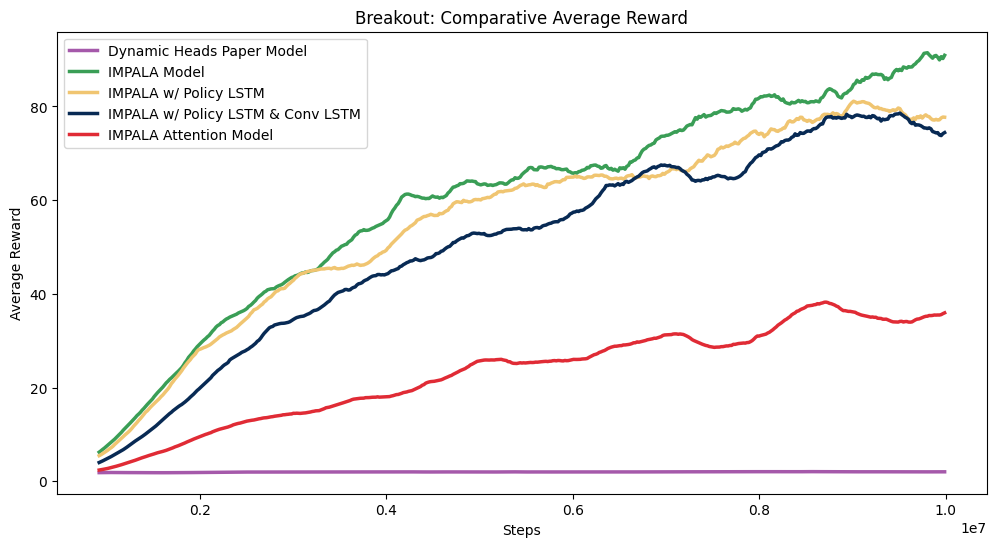

In [ ]:
csv_files_set1 = ['DynamicHeads_Agent_Breakout_10m_steps_entropy_0_01_RUN1.csv',
                  'DynamicHeads_Agent_Breakout_10m_steps_entropy_0_01_RUN2.csv',
                  'DynamicHeads_Agent_Breakout_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set2 = ['Vanilla_IMPALA_Breakout_10m_steps_entropy_0_01_RUN1.csv',
                  'Vanilla_IMPALA_Breakout_10m_steps_entropy_0_01_RUN2.csv',
                  'Vanilla_IMPALA_Breakout_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set3 = ['PolicyLSTM_IMPALA_Breakout_10m_steps_entropy_0_01_RUN1.csv',
                  'PolicyLSTM_IMPALA_Breakout_10m_steps_entropy_0_01_RUN2.csv',
                  'PolicyLSTM_IMPALA_Breakout_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set4 = ['PolicyLSTM_VisionLSTM_10m_steps_entropy_0_01_RUN1.csv',
                  'PolicyLSTM_VisionLSTM_10m_steps_entropy_0_01_RUN2.csv',
                  'PolicyLSTM_VisionLSTM_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set5 = ['Attention_BR_10m_steps_entropy_0_01_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_0_01_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_0_01_RUN3.csv']

plot_comparative_rewards_with_variance(csv_files_set1,
                                       csv_files_set2,
                                       csv_files_set3,
                                       csv_files_set4,
                                       csv_files_set5,
                                       label1='Dynamic Heads Paper Model',
                                       label2='IMPALA Model',
                                       label3='IMPALA w/ Policy LSTM',
                                       label4='IMPALA w/ Policy LSTM & Conv LSTM',
                                       label5='IMPALA Attention Model',
                                       enable_variance_in_plot=False,
                                       use_best_run=False,
                                       title='Breakout: Comparative Average Reward')


### SpaceInvaders: Comparative Average Reward for Various Models

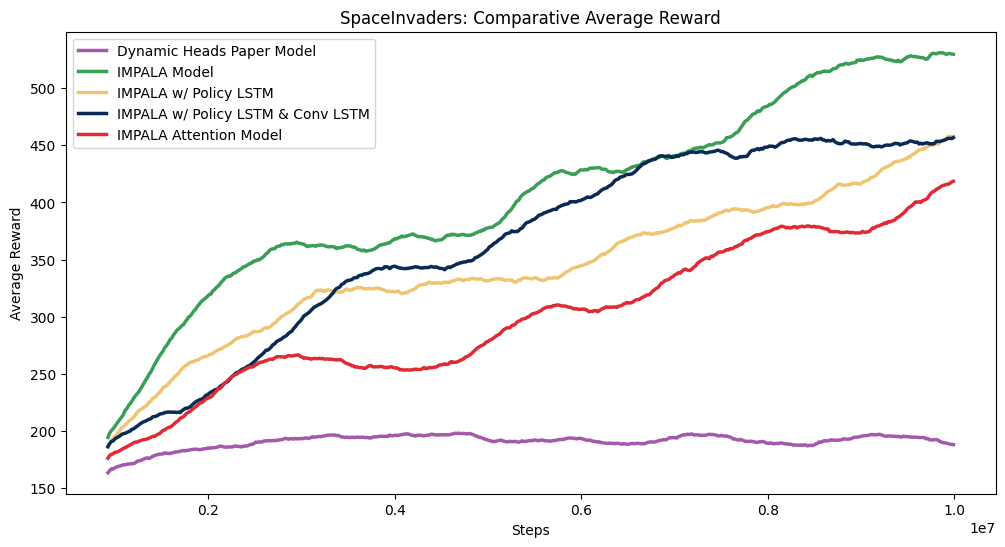

In [ ]:
csv_files_set1 = ['DynamicHeads_SpaceInvaders_10m_steps_entropy_0_01_RUN1.csv',
                  'DynamicHeads_SpaceInvaders_10m_steps_entropy_0_01_RUN2.csv',
                  'DynamicHeads_SpaceInvaders_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set2 = ['Vanilla_IMPALA_SI_10m_steps_entropy_0_01_RUN1.csv',
                  'Vanilla_IMPALA_SI_10m_steps_entropy_0_01_RUN2.csv',
                  'Vanilla_IMPALA_SI_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set3 = ['PolicyLSTM_SpaceInvaders_10m_steps_entropy_0_01_RUN1.csv',
                  'PolicyLSTM_SpaceInvaders_10m_steps_entropy_0_01_RUN2.csv',
                  'PolicyLSTM_SpaceInvaders_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set4 = ['PolicyLSTM_VisionLSTM_SI_10m_steps_entropy_0_01_RUN1.csv',
                  'PolicyLSTM_VisionLSTM_SI_10m_steps_entropy_0_01_RUN2.csv',
                  'PolicyLSTM_VisionLSTM_SI_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set5 = ['Attention_SI_10m_entropy_0.01_RUN1.csv',
                  'Attention_SI_10m_entropy_0.01_RUN2.csv',
                  'Attention_SI_10m_entropy_0.01_RUN3.csv']

plot_comparative_rewards_with_variance(csv_files_set1,
                                       csv_files_set2,
                                       csv_files_set3,
                                       csv_files_set4,
                                       csv_files_set5,
                                       label1='Dynamic Heads Paper Model',
                                       label2='IMPALA Model',
                                       label3='IMPALA w/ Policy LSTM',
                                       label4='IMPALA w/ Policy LSTM & Conv LSTM',
                                       label5='IMPALA Attention Model',
                                       enable_variance_in_plot=False,
                                       title='SpaceInvaders: Comparative Average Reward')

### Seaquest: Comparative Average Reward for Various Models

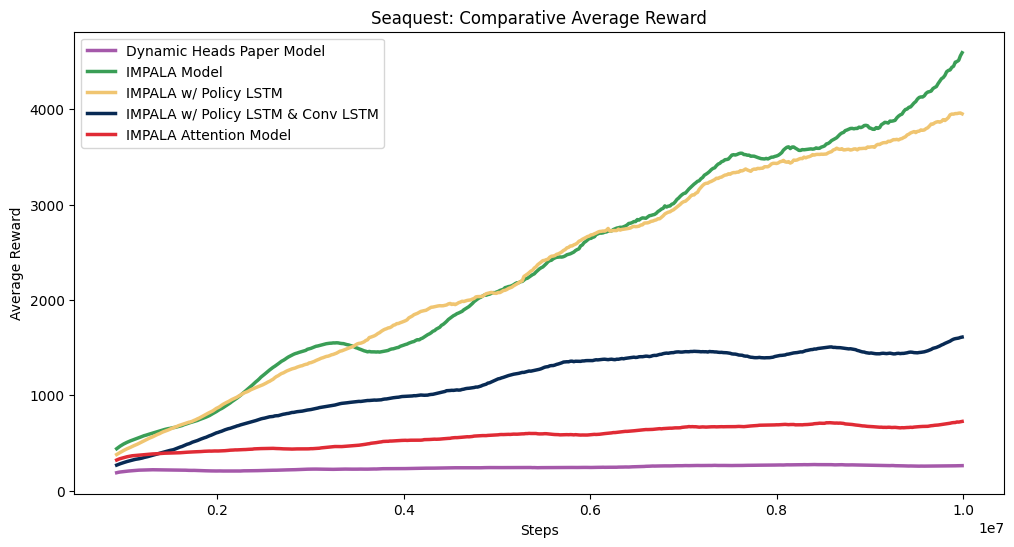

In [ ]:
csv_files_set1 = ['DynamicHeads_Agent_Seaquest_10m_steps_entropy_0_01_RUN1.csv',
                  'DynamicHeads_Agent_Seaquest_10m_steps_entropy_0_01_RUN2.csv',
                  'DynamicHeads_Agent_Seaquest_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set2 = ['Vanilla_IMPALA_Seaquest_10m_steps_entropy_0_01_RUN1.csv',
                  'Vanilla_IMPALA_Seaquest_10m_steps_entropy_0_01_RUN2.csv',
                  'Vanilla_IMPALA_Seaquest_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set3 = ['PolicyLSTM_IMPALA_Seaquest_10m_steps_entropy_0_01_RUN1.csv',
                  'PolicyLSTM_IMPALA_Seaquest_10m_steps_entropy_0_01_RUN2.csv',
                  'PolicyLSTM_IMPALA_Seaquest_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set4 = ['PolicyLSTM_VisionLSTM_Seaquest_10m_steps_entropy_0_01_RUN1.csv',
                  'PolicyLSTM_VisionLSTM_Seaquest_10m_steps_entropy_0_01_RUN2.csv',
                  'PolicyLSTM_VisionLSTM_Seaquest_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set5 = ['Attention_SQ_10m_steps_entropy_0_01_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_01_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_01_RUN3.csv']

plot_comparative_rewards_with_variance(csv_files_set1,
                                       csv_files_set2,
                                       csv_files_set3,
                                       csv_files_set4,
                                       csv_files_set5,
                                       label1='Dynamic Heads Paper Model',
                                       label2='IMPALA Model',
                                       label3='IMPALA w/ Policy LSTM',
                                       label4='IMPALA w/ Policy LSTM & Conv LSTM',
                                       label5='IMPALA Attention Model',
                                       enable_variance_in_plot=False,
                                       title='Seaquest: Comparative Average Reward')

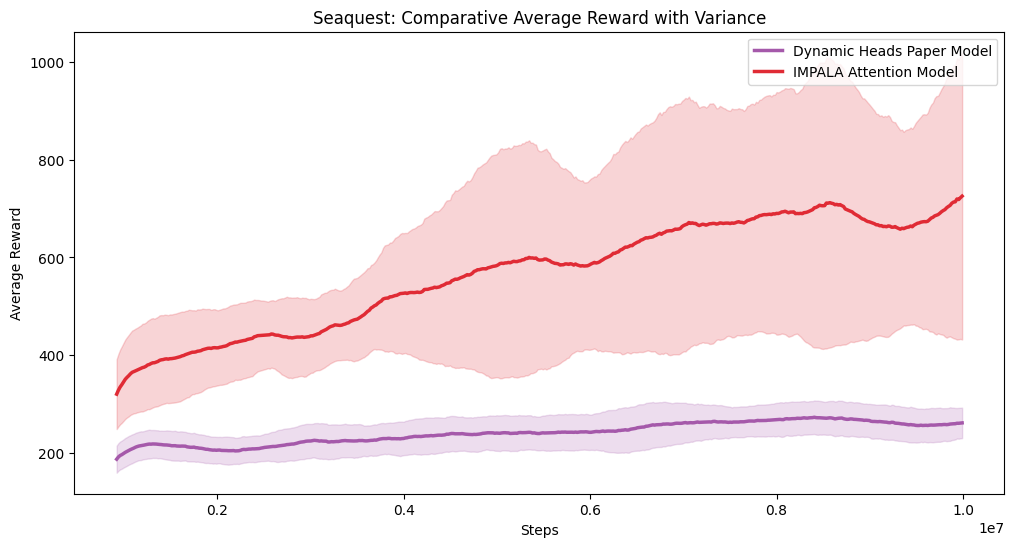

In [ ]:
csv_files_set1 = ['DynamicHeads_Agent_Seaquest_10m_steps_entropy_0_01_RUN1.csv',
                  'DynamicHeads_Agent_Seaquest_10m_steps_entropy_0_01_RUN2.csv',
                  'DynamicHeads_Agent_Seaquest_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set2 = ['Vanilla_IMPALA_Seaquest_10m_steps_entropy_0_01_RUN1.csv',
                  'Vanilla_IMPALA_Seaquest_10m_steps_entropy_0_01_RUN2.csv',
                  'Vanilla_IMPALA_Seaquest_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set3 = ['PolicyLSTM_IMPALA_Seaquest_10m_steps_entropy_0_01_RUN1.csv',
                  'PolicyLSTM_IMPALA_Seaquest_10m_steps_entropy_0_01_RUN2.csv',
                  'PolicyLSTM_IMPALA_Seaquest_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set2 = ['PolicyLSTM_VisionLSTM_Seaquest_10m_steps_entropy_0_01_RUN1.csv',
                  'PolicyLSTM_VisionLSTM_Seaquest_10m_steps_entropy_0_01_RUN2.csv',
                  'PolicyLSTM_VisionLSTM_Seaquest_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set2 = ['Attention_SQ_10m_steps_entropy_0_01_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_01_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_01_RUN3.csv']

plot_comparative_rewards_with_variance(csv_files_set1,
                                       csv_files_set5=csv_files_set2,
                                       #csv_files_set3,
                                       #csv_files_set4,
                                       #csv_files_set5,
                                       label1='Dynamic Heads Paper Model',
                                       #label2='IMPALA Model',
                                       #label3='IMPALA w/ Policy LSTM',
                                       #label2='IMPALA w/ Policy LSTM & Conv LSTM',
                                       label5='IMPALA Attention Model',
                                       enable_variance_in_plot=True,
                                       title='Seaquest: Comparative Average Reward with Variance')

### Breakout Entropy

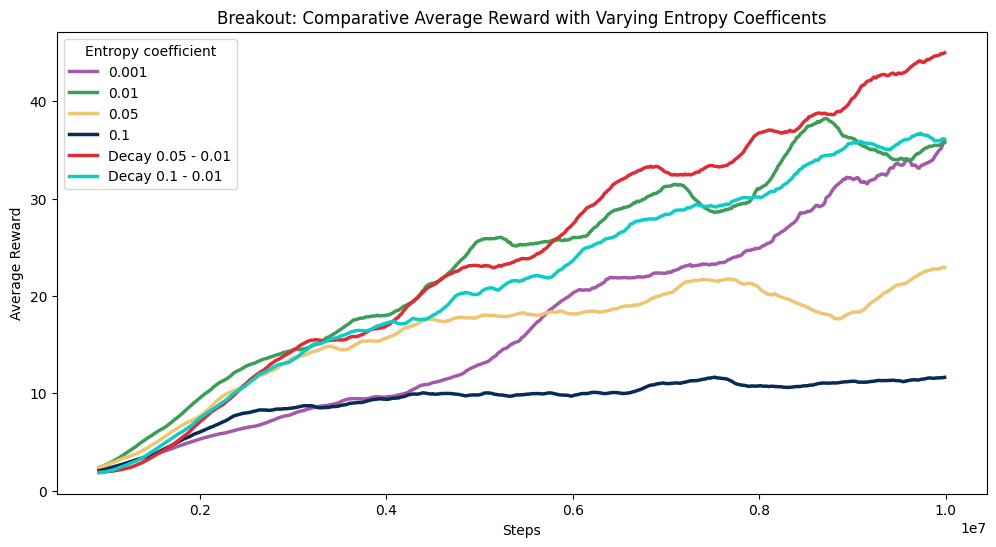

In [ ]:
csv_files_set1 = ['Attention_BR_10m_steps_entropy_0_001_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_0_001_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_0_001_RUN3.csv']

csv_files_set2 = ['Attention_BR_10m_steps_entropy_0_01_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_0_01_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set3 = ['Attention_BR_10m_steps_entropy_0_05_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_0_05_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_0_05_RUN3.csv']

csv_files_set4 = ['Attention_BR_10m_steps_entropy_0_1_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_0_1_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_0_1_RUN3.csv']

csv_files_set5 = ['Attention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN3.csv']

csv_files_set6 = ['Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN3.csv']

plot_comparative_rewards_with_variance(csv_files_set1,
                                       csv_files_set2,
                                       csv_files_set3,
                                       csv_files_set4,
                                       csv_files_set5,
                                       csv_files_set6,
                                       label1='0.001',
                                       label2='0.01',
                                       label3='0.05',
                                       label4='0.1',
                                       label5='Decay 0.05 - 0.01',
                                       label6='Decay 0.1 - 0.01',
                                       enable_variance_in_plot=False,
                                       title='Breakout: Comparative Average Reward with Varying Entropy Coefficents',
                                       legend_title="Entropy coefficient")

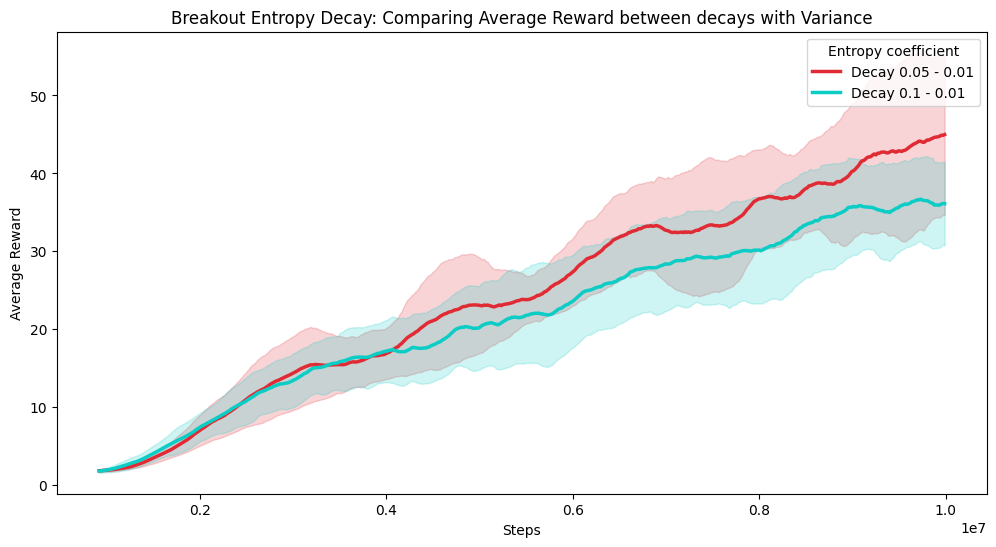

In [ ]:
csv_files_set1 = ['Attention_BR_10m_steps_entropy_0_001_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_0_001_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_0_001_RUN3.csv']

csv_files_set2 = ['Attention_BR_10m_steps_entropy_0_01_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_0_01_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set3 = ['Attention_BR_10m_steps_entropy_0_05_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_0_05_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_0_05_RUN3.csv']

csv_files_set4 = ['Attention_BR_10m_steps_entropy_0_1_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_0_1_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_0_1_RUN3.csv']

csv_files_set5 = ['Attention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN3.csv']

csv_files_set6 = ['Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN3.csv']

plot_comparative_rewards_with_variance(#csv_files_set1,
                                       #csv_files_set2,
                                       #csv_files_set3,
                                       #csv_files_set4,
                                       csv_files_set5=csv_files_set5,
                                       csv_files_set6=csv_files_set6,
                                       #label1='0.001',
                                       #label2='0.01',
                                       #label3='0.05',
                                       #label4='0.1',
                                       label5='Decay 0.05 - 0.01',
                                       label6='Decay 0.1 - 0.01',
                                       enable_variance_in_plot=True,
                                       title='Breakout Entropy Decay: Comparing Average Reward between decays with Variance',
                                       legend_title="Entropy coefficient")

### SpaceInvaders Entropy

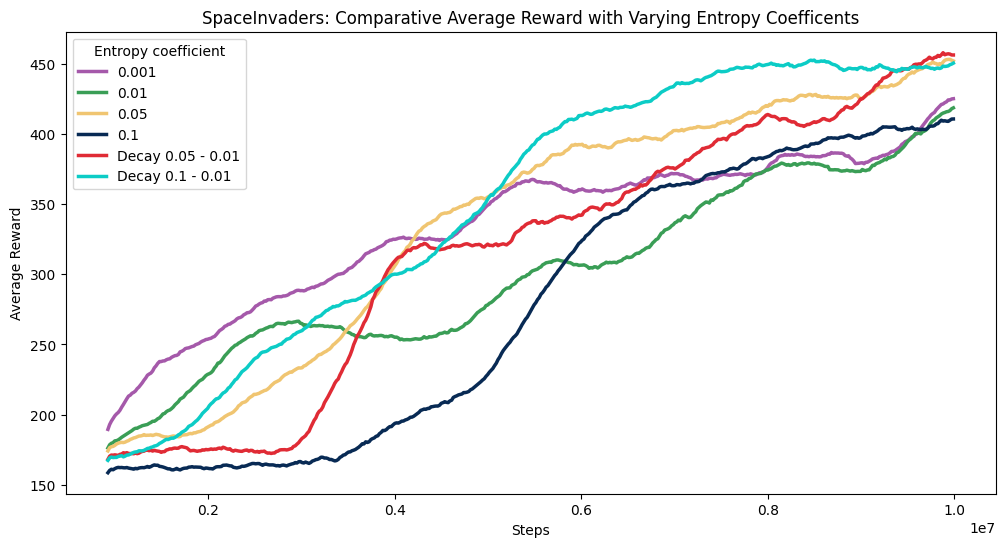

In [ ]:
csv_files_set1 = ['Attention_SI_10m_steps_entropy_0_001_RUN1.csv',
                  'Attention_SI_10m_steps_entropy_0_001_RUN2.csv',
                  'Attention_SI_10m_steps_entropy_0_001_RUN3.csv']

csv_files_set2 = ['Attention_SI_10m_entropy_0.01_RUN1.csv',
                  'Attention_SI_10m_entropy_0.01_RUN2.csv',
                  'Attention_SI_10m_entropy_0.01_RUN3.csv']

csv_files_set3 = ['Attention_SI_10m_steps_entropy_0_05_RUN1.csv',
                  'Attention_SI_10m_steps_entropy_0_05_RUN2.csv',
                  'Attention_SI_10m_steps_entropy_0_05_RUN3.csv']

csv_files_set4 = ['Attention_SI_10m_steps_entropy_0_1_RUN1.csv',
                  'Attention_SI_10m_steps_entropy_0_1_RUN2.csv',
                  'Attention_SI_10m_steps_entropy_0_1_RUN3.csv']

csv_files_set5 = ['Attention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN1.csv',
                  'Attention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN2.csv',
                  'Attention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN3.csv']

csv_files_set6 = ['Attention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN1.csv',
                  'Attention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN2.csv',
                  'Attention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN3.csv']

plot_comparative_rewards_with_variance(csv_files_set1,
                                       csv_files_set2,
                                       csv_files_set3,
                                       csv_files_set4,
                                       csv_files_set5,
                                       csv_files_set6,
                                       label1='0.001',
                                       label2='0.01',
                                       label3='0.05',
                                       label4='0.1',
                                       label5='Decay 0.05 - 0.01',
                                       label6='Decay 0.1 - 0.01',
                                       enable_variance_in_plot=False,
                                       title='SpaceInvaders: Comparative Average Reward with Varying Entropy Coefficents',
                                       legend_title="Entropy coefficient")

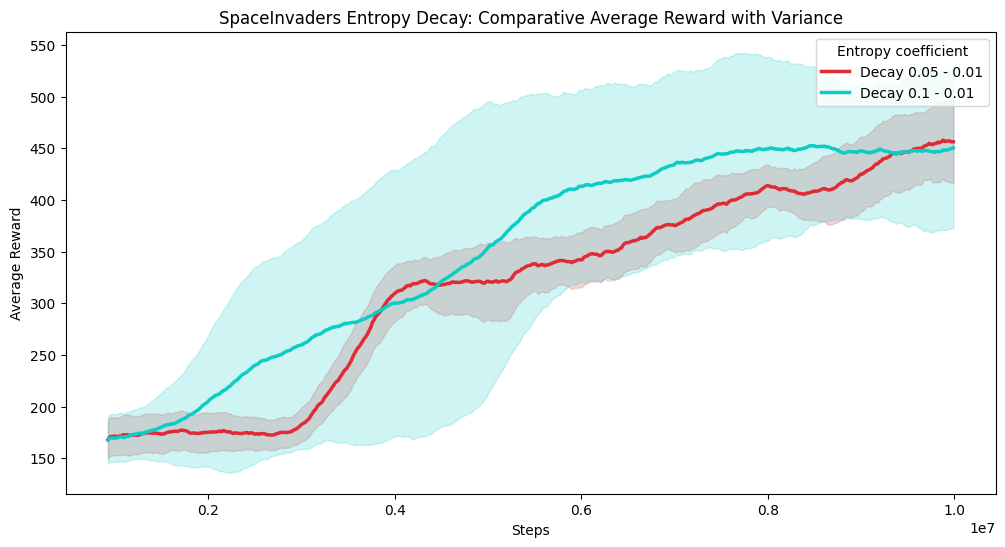

In [ ]:
csv_files_set1 = ['Attention_SI_10m_steps_entropy_0_001_RUN1.csv',
                  'Attention_SI_10m_steps_entropy_0_001_RUN2.csv',
                  'Attention_SI_10m_steps_entropy_0_001_RUN3.csv']

csv_files_set2 = ['Attention_SI_10m_entropy_0.01_RUN1.csv',
                  'Attention_SI_10m_entropy_0.01_RUN2.csv',
                  'Attention_SI_10m_entropy_0.01_RUN3.csv']

csv_files_set3 = ['Attention_SI_10m_steps_entropy_0_05_RUN1.csv',
                  'Attention_SI_10m_steps_entropy_0_05_RUN2.csv',
                  'Attention_SI_10m_steps_entropy_0_05_RUN3.csv']

csv_files_set4 = ['Attention_SI_10m_steps_entropy_0_1_RUN1.csv',
                  'Attention_SI_10m_steps_entropy_0_1_RUN2.csv',
                  'Attention_SI_10m_steps_entropy_0_1_RUN3.csv']

csv_files_set5 = ['Attention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN1.csv',
                  'Attention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN2.csv',
                  'Attention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN3.csv']

csv_files_set6 = ['Attention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN1.csv',
                  'Attention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN2.csv',
                  'Attention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN3.csv']

plot_comparative_rewards_with_variance(csv_files_set5=csv_files_set5,
                                       csv_files_set6=csv_files_set6,
                                       label5='Decay 0.05 - 0.01',
                                       label6='Decay 0.1 - 0.01',
                                       enable_variance_in_plot=True,
                                       title='SpaceInvaders Entropy Decay: Comparative Average Reward with Variance',
                                       legend_title="Entropy coefficient")

### Seaquest Entropy

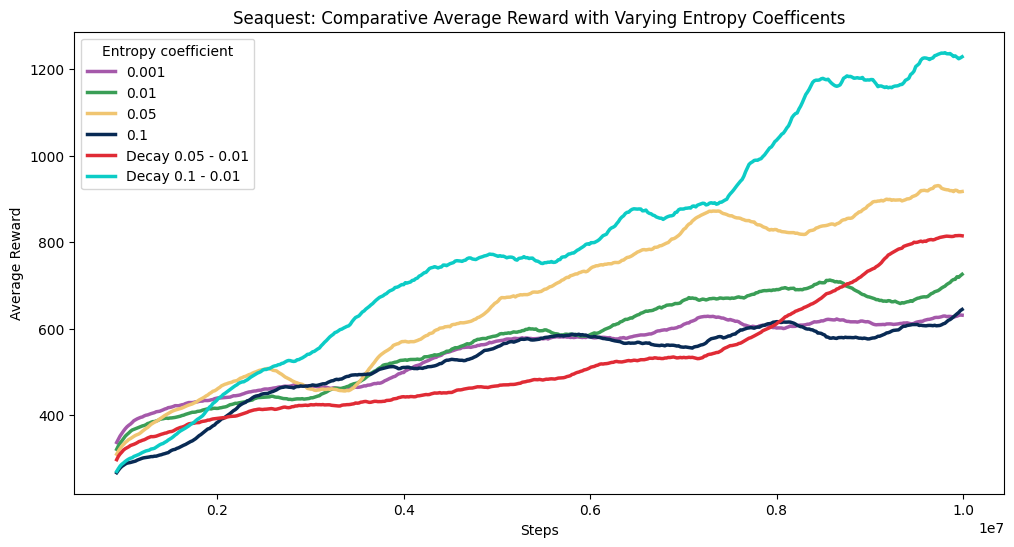

In [ ]:
csv_files_set1 = ['Attention_SQ_10m_steps_entropy_0_001_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_001_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_001_RUN3.csv']

csv_files_set2 = ['Attention_SQ_10m_steps_entropy_0_01_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_01_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set3 = ['Attention_SQ_10m_steps_entropy_0_05_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_05_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_05_RUN3.csv']

csv_files_set4 = ['Attention_SQ_10m_steps_entropy_0_1_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_1_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_1_RUN3.csv']

csv_files_set5 = ['Attention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN3.csv']

csv_files_set6 = ['Attention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN3.csv']

plot_comparative_rewards_with_variance(csv_files_set1,
                                       csv_files_set2,
                                       csv_files_set3,
                                       csv_files_set4,
                                       csv_files_set5,
                                       csv_files_set6,
                                       label1='0.001',
                                       label2='0.01',
                                       label3='0.05',
                                       label4='0.1',
                                       label5='Decay 0.05 - 0.01',
                                       label6='Decay 0.1 - 0.01',
                                       enable_variance_in_plot=False,
                                       title='Seaquest: Comparative Average Reward with Varying Entropy Coefficents',
                                       legend_title="Entropy coefficient")

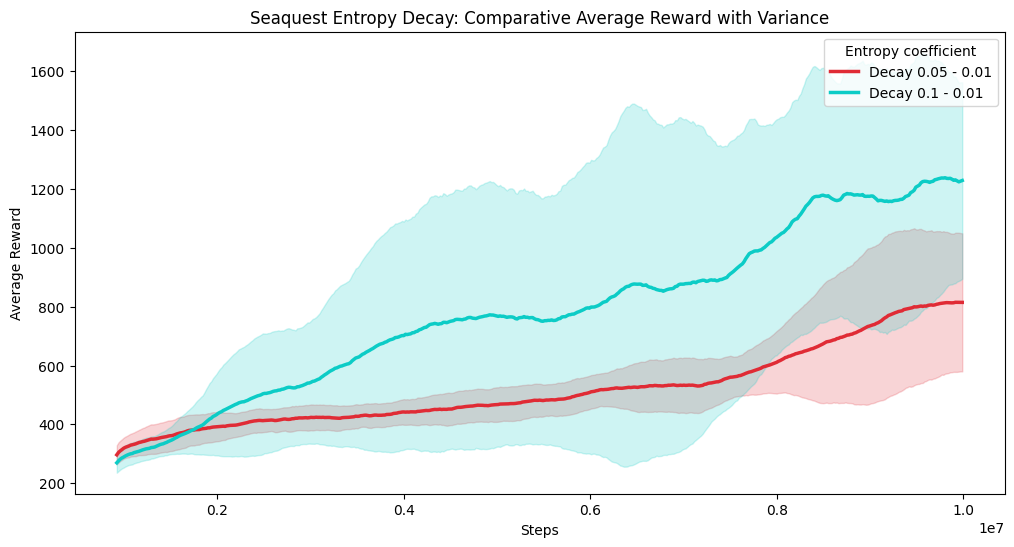

In [ ]:
csv_files_set1 = ['Attention_SQ_10m_steps_entropy_0_001_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_001_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_001_RUN3.csv']

csv_files_set2 = ['Attention_SQ_10m_steps_entropy_0_01_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_01_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set3 = ['Attention_SQ_10m_steps_entropy_0_05_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_05_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_05_RUN3.csv']

csv_files_set4 = ['Attention_SQ_10m_steps_entropy_0_1_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_1_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_1_RUN3.csv']

csv_files_set5 = ['Attention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN3.csv']

csv_files_set6 = ['Attention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN3.csv']

plot_comparative_rewards_with_variance(csv_files_set5=csv_files_set5,
                                       csv_files_set6=csv_files_set6,
                                       label5='Decay 0.05 - 0.01',
                                       label6='Decay 0.1 - 0.01',
                                       enable_variance_in_plot=True,
                                       title='Seaquest Entropy Decay: Comparative Average Reward with Variance',
                                       legend_title="Entropy coefficient")

### Best Runs Comparison Logic

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

n_obs_per_round = 18432
scores = 542

def load_rewards(csv_file):
    df = pd.read_csv(csv_file)
    rewards = df['Reward'].dropna().tolist()
    while len(rewards) < 542:
        if rewards:
            rewards.append(rewards[-1])

    return rewards

def calculate_rolling_average(rewards, window_size):
    rewards_series = pd.Series(rewards)
    rolling_avg = rewards_series.rolling(window=window_size).mean().tolist()
    return rolling_avg

def find_best_run(csv_files):
    best_run = None
    best_reward = float('-inf')
    best_rewards = []

    for csv_file in csv_files:
        rewards = load_rewards(csv_file)
        if rewards[-1] > best_reward:  # Compare the last reward in the list
            best_reward = rewards[-1]
            best_run = csv_file
            best_rewards = rewards

    return best_run, best_rewards

def plot_best_runs_from_multiple_sets(csv_files_sets, labels, window_size=50, title=None, legend_title=None):
    plt.figure(figsize=(12, 6))

    colors = ['#A559AA', '#3a9e56', '#F0C571', '#082A54', '#E02B35', '#0cccc6']
    for i, csv_files_set in enumerate(csv_files_sets):
        label = labels[i]

        _, best_rewards = find_best_run(csv_files_set)

        rolling_avg = calculate_rolling_average(best_rewards, window_size)

        #Calc the train step intervals
        train_step_interval = [j * n_obs_per_round for j in range(1, len(best_rewards) + 1)]

        sns.lineplot(x=train_step_interval, y=rolling_avg, label=label, color=colors[i], linewidth=2.5)

    plt.title(title)
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    if legend_title:
        plt.legend(title=legend_title)
    else:
        plt.legend()

    output_dir = 'saved_plots'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    output_path = os.path.join(output_dir, f'{title}.png')
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()




### Entropy Comparison - Best Runs

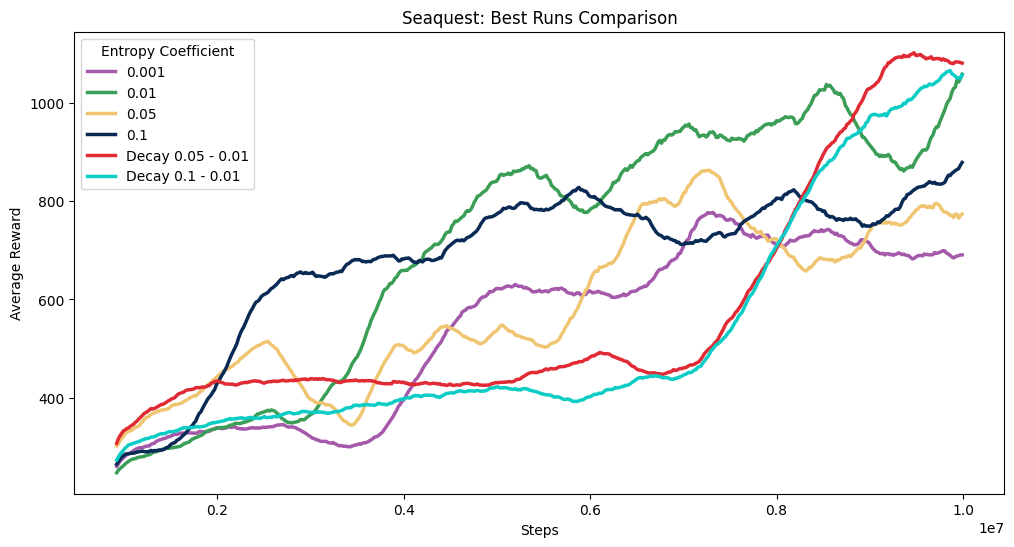

In [ ]:
csv_files_set1 = ['Attention_SQ_10m_steps_entropy_0_001_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_001_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_001_RUN3.csv']

csv_files_set2 = ['Attention_SQ_10m_steps_entropy_0_01_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_01_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set3 = ['Attention_SQ_10m_steps_entropy_0_05_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_05_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_05_RUN3.csv']

csv_files_set4 = ['Attention_SQ_10m_steps_entropy_0_1_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_1_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_1_RUN3.csv']

csv_files_set5 = ['Attention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN3.csv']

csv_files_set6 = ['Attention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN3.csv']

csv_files_sets = [csv_files_set1, csv_files_set2, csv_files_set3, csv_files_set4, csv_files_set5, csv_files_set6]

labels = [
    "0.001",
    "0.01",
    "0.05",
    "0.1",
    "Decay 0.05 - 0.01",
    "Decay 0.1 - 0.01"
]


plot_comparative_rewards_with_variance(csv_files_set1,
                                       csv_files_set2,
                                       csv_files_set3,
                                       csv_files_set4,
                                       csv_files_set5,
                                       csv_files_set6,
                                       label1='0.001',
                                       label2='0.01',
                                       label3='0.05',
                                       label4='0.1',
                                       label5='Decay 0.05 - 0.01',
                                       label6='Decay 0.1 - 0.01',
                                       enable_variance_in_plot=True,
                                       use_best_run=True,
                                       legend_title="Entropy Coefficient",
                                       title="Seaquest: Best Runs Comparison")


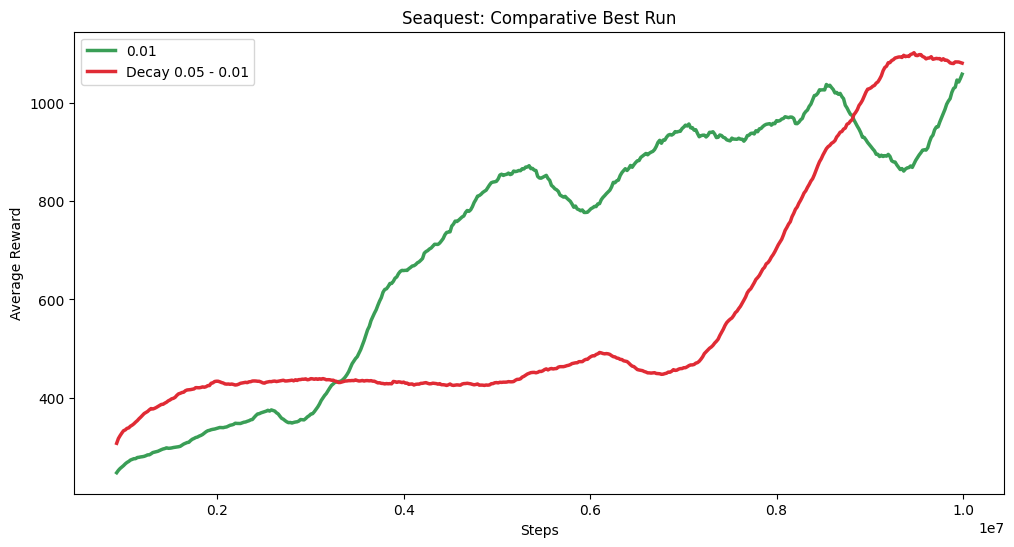

In [ ]:
csv_files_set1 = ['Attention_SQ_10m_steps_entropy_0_001_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_001_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_001_RUN3.csv']

csv_files_set2 = ['Attention_SQ_10m_steps_entropy_0_01_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_01_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set3 = ['Attention_SQ_10m_steps_entropy_0_05_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_05_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_05_RUN3.csv']

csv_files_set4 = ['Attention_SQ_10m_steps_entropy_0_1_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_1_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_1_RUN3.csv']

csv_files_set5 = ['Attention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN3.csv']

csv_files_set6 = ['Attention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN3.csv']

csv_files_sets = [csv_files_set2, csv_files_set5]

plot_comparative_rewards_with_variance(
                                       csv_files_set2=csv_files_set2,
                                       csv_files_set5=csv_files_set5,
                                       #label1='Dynamic Heads Paper Model',
                                       label2="0.01",
                                       label5="Decay 0.05 - 0.01",
                                       enable_variance_in_plot=True,
                                       use_best_run=True,
                                       title='Seaquest: Comparative Best Run')

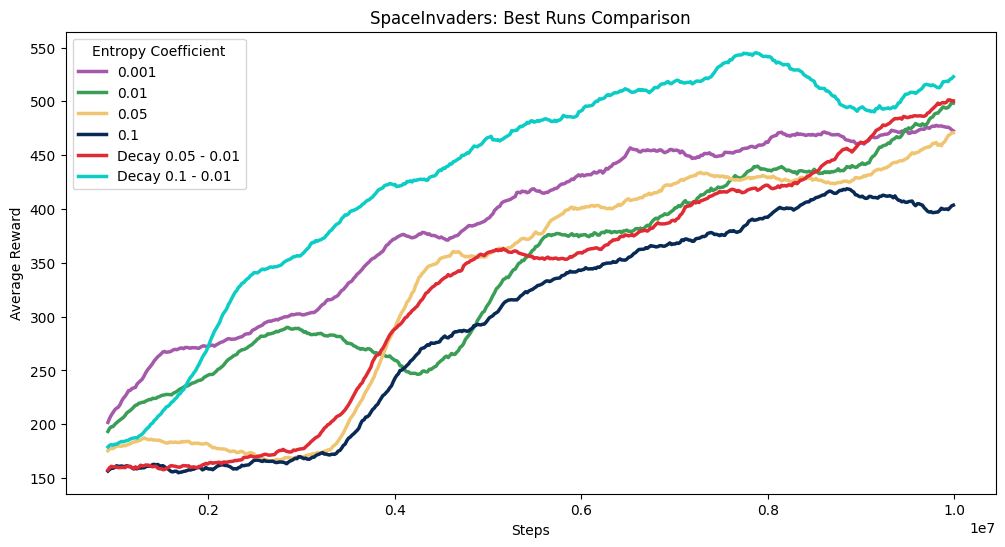

In [ ]:
csv_files_set1 = ['Attention_SI_10m_steps_entropy_0_001_RUN1.csv',
                  'Attention_SI_10m_steps_entropy_0_001_RUN2.csv',
                  'Attention_SI_10m_steps_entropy_0_001_RUN3.csv']

csv_files_set2 = ['Attention_SI_10m_entropy_0.01_RUN1.csv',
                  'Attention_SI_10m_entropy_0.01_RUN2.csv',
                  'Attention_SI_10m_entropy_0.01_RUN3.csv']

csv_files_set3 = ['Attention_SI_10m_steps_entropy_0_05_RUN1.csv',
                  'Attention_SI_10m_steps_entropy_0_05_RUN2.csv',
                  'Attention_SI_10m_steps_entropy_0_05_RUN3.csv']

csv_files_set4 = ['Attention_SI_10m_steps_entropy_0_1_RUN1.csv',
                  'Attention_SI_10m_steps_entropy_0_1_RUN2.csv',
                  'Attention_SI_10m_steps_entropy_0_1_RUN3.csv']

csv_files_set5 = ['Attention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN1.csv',
                  'Attention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN2.csv',
                  'Attention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN3.csv']

csv_files_set6 = ['Attention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN1.csv',
                  'Attention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN2.csv',
                  'Attention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN3.csv']


csv_files_sets = [csv_files_set1, csv_files_set2, csv_files_set3, csv_files_set4, csv_files_set5, csv_files_set6]

labels = [
    "0.001",
    "0.01",
    "0.05",
    "0.1",
    "Decay 0.05 - 0.01",
    "Decay 0.1 - 0.01"
]

plot_comparative_rewards_with_variance(csv_files_set1,
                                       csv_files_set2,
                                       csv_files_set3,
                                       csv_files_set4,
                                       csv_files_set5,
                                       csv_files_set6,
                                       label1='0.001',
                                       label2='0.01',
                                       label3='0.05',
                                       label4='0.1',
                                       label5='Decay 0.05 - 0.01',
                                       label6='Decay 0.1 - 0.01',
                                       enable_variance_in_plot=True,
                                       use_best_run=True,
                                       title="SpaceInvaders: Best Runs Comparison",
                                       legend_title="Entropy Coefficient")

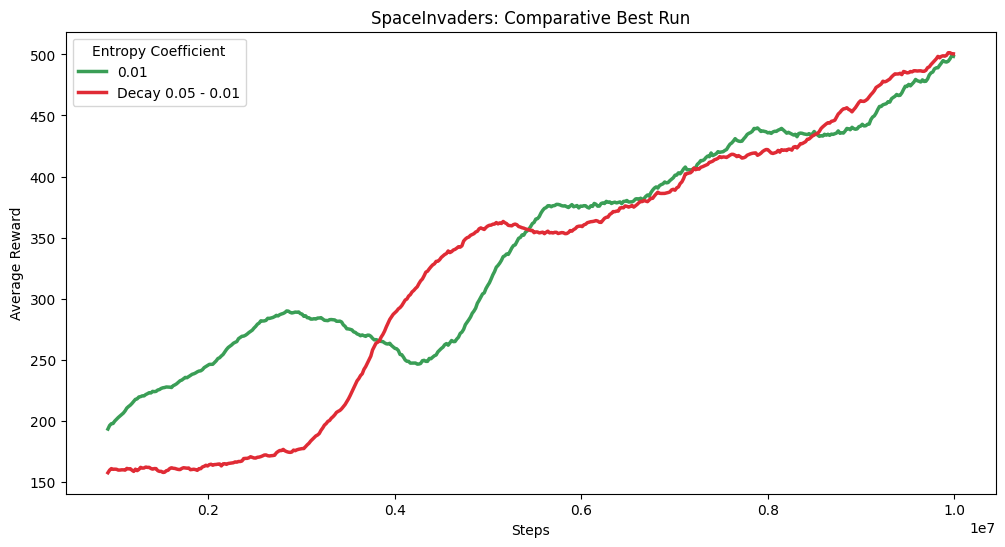

In [ ]:
csv_files_set1 = ['Attention_SI_10m_steps_entropy_0_001_RUN1.csv',
                  'Attention_SI_10m_steps_entropy_0_001_RUN2.csv',
                  'Attention_SI_10m_steps_entropy_0_001_RUN3.csv']

csv_files_set2 = ['Attention_SI_10m_entropy_0.01_RUN1.csv',
                  'Attention_SI_10m_entropy_0.01_RUN2.csv',
                  'Attention_SI_10m_entropy_0.01_RUN3.csv']

csv_files_set3 = ['Attention_SI_10m_steps_entropy_0_05_RUN1.csv',
                  'Attention_SI_10m_steps_entropy_0_05_RUN2.csv',
                  'Attention_SI_10m_steps_entropy_0_05_RUN3.csv']

csv_files_set4 = ['Attention_SI_10m_steps_entropy_0_1_RUN1.csv',
                  'Attention_SI_10m_steps_entropy_0_1_RUN2.csv',
                  'Attention_SI_10m_steps_entropy_0_1_RUN3.csv']

csv_files_set5 = ['Attention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN1.csv',
                  'Attention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN2.csv',
                  'Attention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN3.csv']

csv_files_set6 = ['Attention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN1.csv',
                  'Attention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN2.csv',
                  'Attention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN3.csv']

csv_files_sets = [csv_files_set2, csv_files_set5]

labels = [

    "0.01",

    "Decay 0.05 - 0.01",

]

plot_comparative_rewards_with_variance(
                                       csv_files_set2=csv_files_set2,
                                       csv_files_set5=csv_files_set5,
                                       label2='0.01',

                                       label5='Decay 0.05 - 0.01',

                                       enable_variance_in_plot=True,
                                       use_best_run=True,
                                       title="SpaceInvaders: Comparative Best Run",
                                       legend_title="Entropy Coefficient")

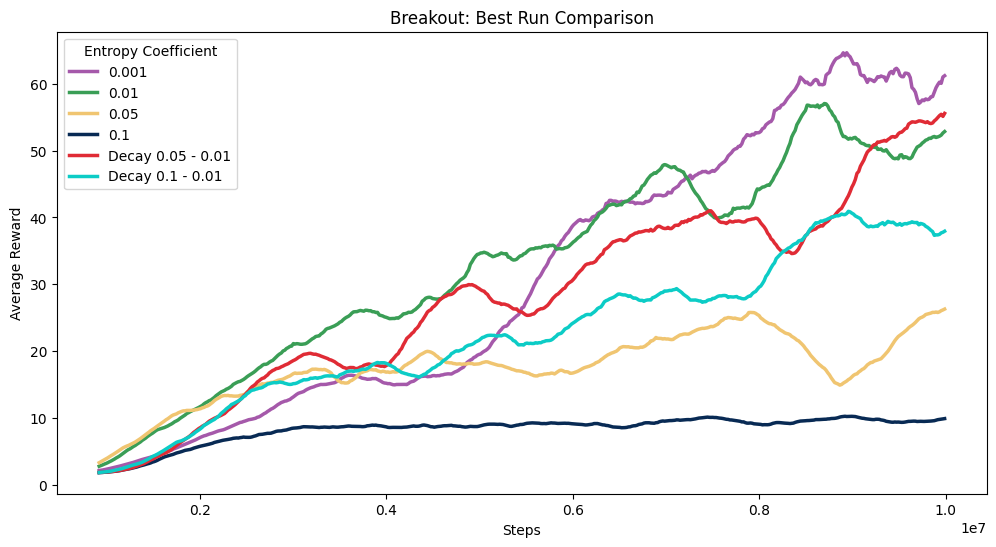

In [ ]:
csv_files_set1 = ['Attention_BR_10m_steps_entropy_0_001_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_0_001_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_0_001_RUN3.csv']

csv_files_set2 = ['Attention_BR_10m_steps_entropy_0_01_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_0_01_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set3 = ['Attention_BR_10m_steps_entropy_0_05_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_0_05_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_0_05_RUN3.csv']

csv_files_set4 = ['Attention_BR_10m_steps_entropy_0_1_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_0_1_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_0_1_RUN3.csv']

csv_files_set5 = ['Attention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN3.csv']

csv_files_set6 = ['Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN3.csv']


csv_files_sets = [csv_files_set1, csv_files_set2, csv_files_set3, csv_files_set4, csv_files_set5, csv_files_set6]

labels = [
    "0.001",
    "0.01",
    "0.05",
    "0.1",
    "Decay 0.05 - 0.01",
    "Decay 0.1 - 0.01"
]

plot_comparative_rewards_with_variance(csv_files_set1,
                                       csv_files_set2,
                                       csv_files_set3,
                                       csv_files_set4,
                                       csv_files_set5,
                                       csv_files_set6,
                                       label1='0.001',
                                       label2='0.01',
                                       label3='0.05',
                                       label4='0.1',
                                       label5='Decay 0.05 - 0.01',
                                       label6='Decay 0.1 - 0.01',
                                       enable_variance_in_plot=True,
                                       use_best_run=True,
                                       title="Breakout: Best Run Comparison",
                                       legend_title="Entropy Coefficient")

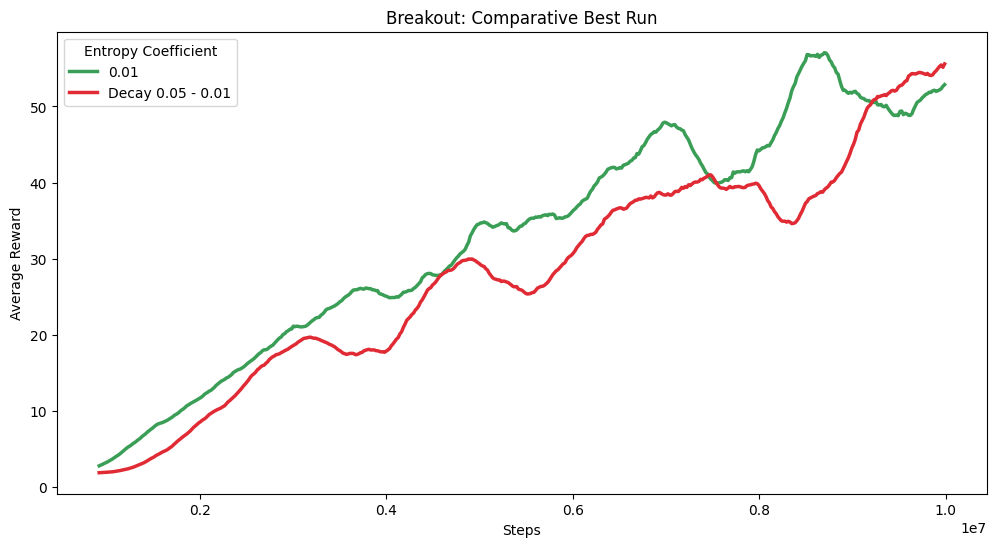

In [ ]:
csv_files_set1 = ['Attention_BR_10m_steps_entropy_0_001_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_0_001_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_0_001_RUN3.csv']

csv_files_set2 = ['Attention_BR_10m_steps_entropy_0_01_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_0_01_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set3 = ['Attention_BR_10m_steps_entropy_0_05_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_0_05_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_0_05_RUN3.csv']

csv_files_set4 = ['Attention_BR_10m_steps_entropy_0_1_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_0_1_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_0_1_RUN3.csv']

csv_files_set5 = ['Attention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN3.csv']

csv_files_set6 = ['Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN3.csv']

csv_files_sets = [csv_files_set2, csv_files_set5]

labels = [

    "0.01",

    "Decay 0.05 - 0.01",

]

plot_comparative_rewards_with_variance(
                                       csv_files_set2=csv_files_set2,
                                       csv_files_set5=csv_files_set5,
                                       label2='0.01',

                                       label5='Decay 0.05 - 0.01',

                                       enable_variance_in_plot=True,
                                       use_best_run=True,
                                       title="Breakout: Comparative Best Run",
                                       legend_title="Entropy Coefficient")

### Model Comparison - Best Run


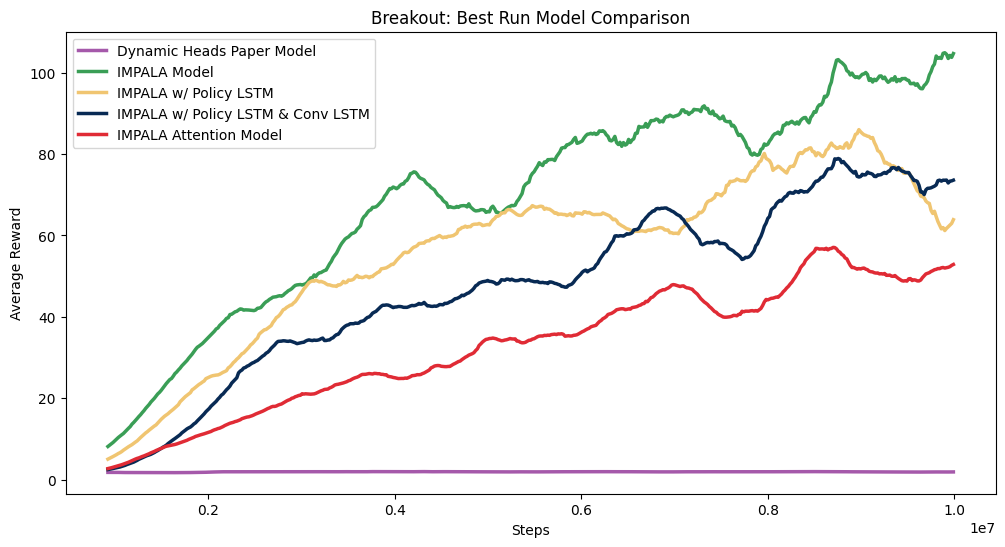

In [ ]:
csv_files_set1 = ['DynamicHeads_Agent_Breakout_10m_steps_entropy_0_01_RUN1.csv',
                  'DynamicHeads_Agent_Breakout_10m_steps_entropy_0_01_RUN2.csv',
                  'DynamicHeads_Agent_Breakout_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set2 = ['Vanilla_IMPALA_Breakout_10m_steps_entropy_0_01_RUN1.csv',
                  'Vanilla_IMPALA_Breakout_10m_steps_entropy_0_01_RUN2.csv',
                  'Vanilla_IMPALA_Breakout_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set3 = ['PolicyLSTM_IMPALA_Breakout_10m_steps_entropy_0_01_RUN1.csv',
                  'PolicyLSTM_IMPALA_Breakout_10m_steps_entropy_0_01_RUN2.csv',
                  'PolicyLSTM_IMPALA_Breakout_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set4 = ['PolicyLSTM_VisionLSTM_10m_steps_entropy_0_01_RUN1.csv',
                  'PolicyLSTM_VisionLSTM_10m_steps_entropy_0_01_RUN2.csv',
                  'PolicyLSTM_VisionLSTM_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set5 = ['Attention_BR_10m_steps_entropy_0_01_RUN1.csv',
                  'Attention_BR_10m_steps_entropy_0_01_RUN2.csv',
                  'Attention_BR_10m_steps_entropy_0_01_RUN3.csv']

csv_files_sets = [csv_files_set1, csv_files_set2, csv_files_set3, csv_files_set4, csv_files_set5, csv_files_set6]

labels = [
    'Dynamic Heads Paper Model',
    'IMPALA Model',
    'IMPALA w/ Policy LSTM',
    'IMPALA w/ Policy LSTM & Conv LSTM',
    'IMPALA Attention Model'
]

plot_comparative_rewards_with_variance(csv_files_set1,
                                       csv_files_set2,
                                       csv_files_set3,
                                       csv_files_set4,
                                       csv_files_set5,
                                       label1='Dynamic Heads Paper Model',
                                       label2='IMPALA Model',
                                       label3='IMPALA w/ Policy LSTM',
                                       label4='IMPALA w/ Policy LSTM & Conv LSTM',
                                       label5='IMPALA Attention Model',
                                       enable_variance_in_plot=False,
                                       use_best_run=True,
                                       title="Breakout: Best Run Model Comparison",
                                       )

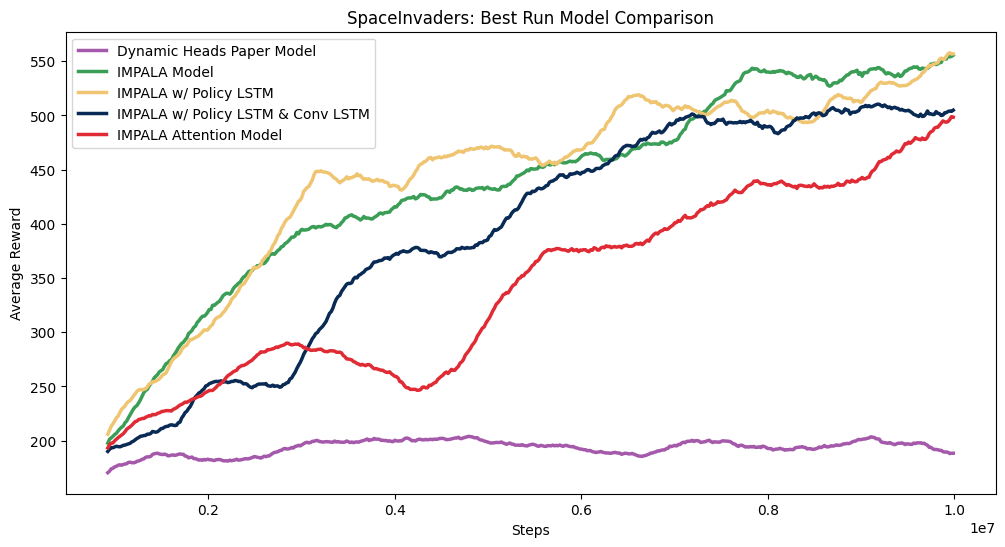

In [ ]:
csv_files_set1 = ['DynamicHeads_SpaceInvaders_10m_steps_entropy_0_01_RUN1.csv',
                  'DynamicHeads_SpaceInvaders_10m_steps_entropy_0_01_RUN2.csv',
                  'DynamicHeads_SpaceInvaders_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set2 = ['Vanilla_IMPALA_SI_10m_steps_entropy_0_01_RUN1.csv',
                  'Vanilla_IMPALA_SI_10m_steps_entropy_0_01_RUN2.csv',
                  'Vanilla_IMPALA_SI_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set3 = ['PolicyLSTM_SpaceInvaders_10m_steps_entropy_0_01_RUN1.csv',
                  'PolicyLSTM_SpaceInvaders_10m_steps_entropy_0_01_RUN2.csv',
                  'PolicyLSTM_SpaceInvaders_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set4 = ['PolicyLSTM_VisionLSTM_SI_10m_steps_entropy_0_01_RUN1.csv',
                  'PolicyLSTM_VisionLSTM_SI_10m_steps_entropy_0_01_RUN2.csv',
                  'PolicyLSTM_VisionLSTM_SI_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set5 = ['Attention_SI_10m_entropy_0.01_RUN1.csv',
                  'Attention_SI_10m_entropy_0.01_RUN2.csv',
                  'Attention_SI_10m_entropy_0.01_RUN3.csv']

csv_files_sets = [csv_files_set1, csv_files_set2, csv_files_set3, csv_files_set4, csv_files_set5, csv_files_set6]

labels = [
    'Dynamic Heads Paper Model',
    'IMPALA Model',
    'IMPALA w/ Policy LSTM',
    'IMPALA w/ Policy LSTM & Conv LSTM',
    'IMPALA Attention Model'
]

plot_comparative_rewards_with_variance(csv_files_set1,
                                       csv_files_set2,
                                       csv_files_set3,
                                       csv_files_set4,
                                       csv_files_set5,
                                       label1='Dynamic Heads Paper Model',
                                       label2='IMPALA Model',
                                       label3='IMPALA w/ Policy LSTM',
                                       label4='IMPALA w/ Policy LSTM & Conv LSTM',
                                       label5='IMPALA Attention Model',
                                       enable_variance_in_plot=False,
                                       use_best_run=True,
                                       title="SpaceInvaders: Best Run Model Comparison",
                                       )

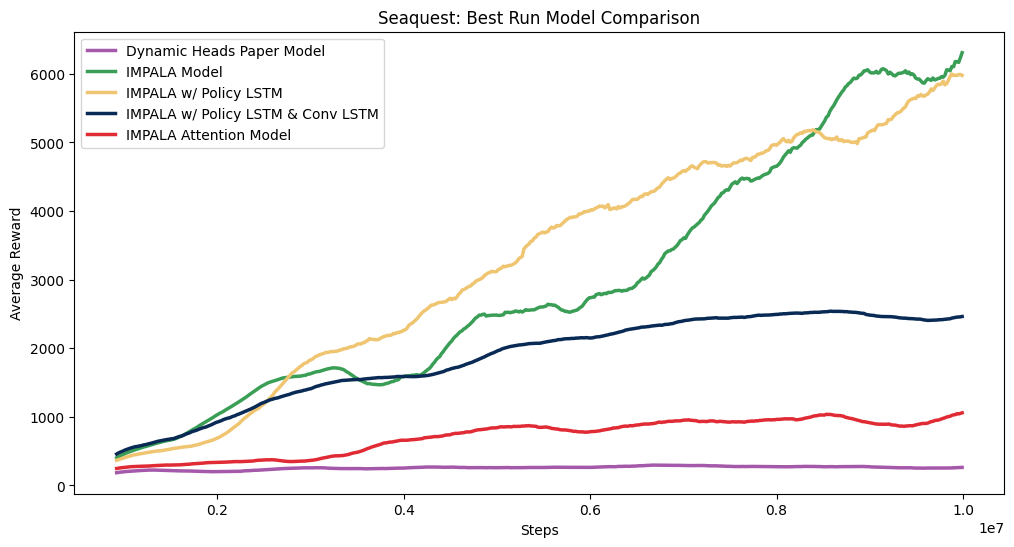

In [ ]:
csv_files_set1 = ['DynamicHeads_Agent_Seaquest_10m_steps_entropy_0_01_RUN1.csv',
                  'DynamicHeads_Agent_Seaquest_10m_steps_entropy_0_01_RUN2.csv',
                  'DynamicHeads_Agent_Seaquest_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set2 = ['Vanilla_IMPALA_Seaquest_10m_steps_entropy_0_01_RUN1.csv',
                  'Vanilla_IMPALA_Seaquest_10m_steps_entropy_0_01_RUN2.csv',
                  'Vanilla_IMPALA_Seaquest_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set3 = ['PolicyLSTM_IMPALA_Seaquest_10m_steps_entropy_0_01_RUN1.csv',
                  'PolicyLSTM_IMPALA_Seaquest_10m_steps_entropy_0_01_RUN2.csv',
                  'PolicyLSTM_IMPALA_Seaquest_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set4 = ['PolicyLSTM_VisionLSTM_Seaquest_10m_steps_entropy_0_01_RUN1.csv',
                  'PolicyLSTM_VisionLSTM_Seaquest_10m_steps_entropy_0_01_RUN2.csv',
                  'PolicyLSTM_VisionLSTM_Seaquest_10m_steps_entropy_0_01_RUN3.csv']

csv_files_set5 = ['Attention_SQ_10m_steps_entropy_0_01_RUN1.csv',
                  'Attention_SQ_10m_steps_entropy_0_01_RUN2.csv',
                  'Attention_SQ_10m_steps_entropy_0_01_RUN3.csv']

csv_files_sets = [csv_files_set1, csv_files_set2, csv_files_set3, csv_files_set4, csv_files_set5, csv_files_set6]

labels = [
    'Dynamic Heads Paper Model',
    'IMPALA Model',
    'IMPALA w/ Policy LSTM',
    'IMPALA w/ Policy LSTM & Conv LSTM',
    'IMPALA Attention Model'
]

plot_comparative_rewards_with_variance(csv_files_set1,
                                       csv_files_set2,
                                       csv_files_set3,
                                       csv_files_set4,
                                       csv_files_set5,
                                       label1='Dynamic Heads Paper Model',
                                       label2='IMPALA Model',
                                       label3='IMPALA w/ Policy LSTM',
                                       label4='IMPALA w/ Policy LSTM & Conv LSTM',
                                       label5='IMPALA Attention Model',
                                       enable_variance_in_plot=False,
                                       use_best_run=True,
                                       title="Seaquest: Best Run Model Comparison",
                                       )



In [ ]:
from PIL import Image

def combine_images(image_paths, grid_size, output_path):
    images = [Image.open(img_path) for img_path in image_paths]

    img_width, img_height = images[0].size

    grid_width, grid_height = grid_size
    combined_width = img_width * grid_width
    combined_height = img_height * grid_height

    combined_image = Image.new('RGB', (combined_width, combined_height))

    for index, image in enumerate(images):
        x = index % grid_width * img_width
        y = index // grid_width * img_height
        combined_image.paste(image, (x, y))

    combined_image.save(output_path)

In [ ]:
from PIL import Image

def combine_images(image_paths, grid_size, output_path):
    images = [Image.open(img_path) for img_path in image_paths]
    img_width, img_height = images[0].size

    grid_width, grid_height = grid_size
    padding = 10
    combined_width = img_width * grid_width + padding * (grid_width + 1)
    combined_height = img_height * grid_height + padding * (grid_height + 1)
    combined_image = Image.new('RGB', (combined_width, combined_height), 'white')

    for index, image in enumerate(images):
        x = index % grid_width * (img_width + padding) + padding
        y = index // grid_width * (img_height + padding) + padding

        combined_image.paste(image, (x, y))

    combined_image.save(output_path)
    combined_image.show()

### Compiling Entropy of Attention heads into single image

In [ ]:
Bestimage_paths = [
    'atn_Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN1.png',
    'atn_Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN2.png',
    'atn_Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN3.png',

    'atn_Attention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN1.png',
    'atn_Attention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN2.png',
    'atn_Attention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN3.png',

    'atn_Attention_BR_10m_steps_entropy_0_001_RUN1.png',
    'atn_Attention_BR_10m_steps_entropy_0_001_RUN2.png',
    'atn_Attention_BR_10m_steps_entropy_0_001_RUN3.png',

    'atn_Attention_BR_10m_steps_entropy_0_01_RUN1.png',
    'atn_Attention_BR_10m_steps_entropy_0_01_RUN2.png',
    'atn_Attention_BR_10m_steps_entropy_0_01_RUN3.png',

    'atn_Attention_BR_10m_steps_entropy_0_05_RUN1.png',
    'atn_Attention_BR_10m_steps_entropy_0_05_RUN2.png',
    'atn_Attention_BR_10m_steps_entropy_0_05_RUN3.png',

    'atn_Attention_BR_10m_steps_entropy_0_1_RUN1.png',
    'atn_Attention_BR_10m_steps_entropy_0_1_RUN2.png',
    'atn_Attention_BR_10m_steps_entropy_0_1_RUN3.png',
]
grid_size = (3, 6)  #3 columns 6 rows
output_path = 'Breakout_combined_image.png'

combine_images(image_paths, grid_size, output_path)

FileNotFoundError: [Errno 2] No such file or directory: 'atn_Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN1.png'

In [ ]:
image_paths = [

    'Attention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN1.png',
    'Attention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN2.png',
    'Attention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN3.png',

    'atn_Attention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN1.png',
    'atn_Attention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN2.png',
    'atn_Attention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN3.png',


    'Attention_SQ_10m_steps_entropy_0_001_RUN1.png',
    'Attention_SQ_10m_steps_entropy_0_001_RUN2.png',
    'Attention_SQ_10m_steps_entropy_0_001_RUN3.png',

    'Attention_SQ_10m_steps_entropy_0_01_RUN1.png',
    'Attention_SQ_10m_steps_entropy_0_01_RUN2.png',
    'Attention_SQ_10m_steps_entropy_0_01_RUN3.png',

    'Attention_SQ_10m_steps_entropy_0_05_RUN1.png',
    'Attention_SQ_10m_steps_entropy_0_05_RUN2.png',
    'Attention_SQ_10m_steps_entropy_0_05_RUN3.png',

    'Attention_SQ_10m_steps_entropy_0_1_RUN1.png',
    'Attention_SQ_10m_steps_entropy_0_1_RUN2.png',
    'Attention_SQ_10m_steps_entropy_0_1_RUN3.png',


]
grid_size = (3, 6) #3 col, 6 row
output_path = 'Seaquest_combined_image.png'

combine_images(image_paths, grid_size, output_path)

In [ ]:
image_paths = [

    'Attention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN1.png',
    'Attention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN2.png',
    'Attention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN3.png',

    'Attention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN1.png',
    'Attention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN2.png',
    'Attention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN3.png',

    'Attention_SI_10m_steps_entropy_0_001_RUN1.png',
    'Attention_SI_10m_steps_entropy_0_001_RUN2.png',
    'Attention_SI_10m_steps_entropy_0_001_RUN3.png',

    'Attention_SI_10m_entropy_0.01_RUN1.png',
    'Attention_SI_10m_entropy_0.01_RUN2.png',
    'Attention_SI_10m_entropy_0.01_RUN3.png',

    'Attention_SI_10m_steps_entropy_0_05_RUN1.png',
    'Attention_SI_10m_steps_entropy_0_05_RUN2.png',
    'Attention_SI_10m_steps_entropy_0_05_RUN3.png',

    'Attention_SI_10m_steps_entropy_0_1_RUN1.png',
    'Attention_SI_10m_steps_entropy_0_1_RUN2.png',
    'Attention_SI_10m_steps_entropy_0_1_RUN3.png',

]
grid_size = (3, 6)  #3 col, 6 row
output_path = 'SpaceInvaders_combined_image.png'

combine_images(image_paths, grid_size, output_path)

### Compiling Entropy of Action Distribution into single image

In [ ]:
image_paths = [
    'Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN1.png',
    'Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN2.png',
    'Attention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN3.png',

    'Attention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN1.png',
    'Attention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN2.png',
    'Attention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN3.png',

    'Attention_BR_10m_steps_entropy_0_001_RUN1.png',
    'Attention_BR_10m_steps_entropy_0_001_RUN2.png',
    'Attention_BR_10m_steps_entropy_0_001_RUN3.png',

    'Attention_BR_10m_steps_entropy_0_01_RUN1.png',
    'Attention_BR_10m_steps_entropy_0_01_RUN2.png',
    'Attention_BR_10m_steps_entropy_0_01_RUN3.png',

    'Attention_BR_10m_steps_entropy_0_05_RUN1.png',
    'Attention_BR_10m_steps_entropy_0_05_RUN2.png',
    'Attention_BR_10m_steps_entropy_0_05_RUN3.png',

    'Attention_BR_10m_steps_entropy_0_1_RUN1.png',
    'Attention_BR_10m_steps_entropy_0_1_RUN2.png',
    'Attention_BR_10m_steps_entropy_0_1_RUN3.png',
]
grid_size = (3, 6) #3 col, 6 row
output_path = 'Breakout_combined_entropy_image.png'

combine_images(image_paths, grid_size, output_path)

In [ ]:
image_paths = [
    'aAttention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN1.png',
    'aAttention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN2.png',
    'aAttention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN3.png',

    'aAttention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN1.png',
    'aAttention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN2.png',
    'aAttention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN3.png',

    'aAttention_SQ_10m_steps_entropy_0_001_RUN1.png',
    'aAttention_SQ_10m_steps_entropy_0_001_RUN2.png',
    'aAttention_SQ_10m_steps_entropy_0_001_RUN3.png',

    'aAttention_SQ_10m_steps_entropy_0_01_RUN1.png',
    'aAttention_SQ_10m_steps_entropy_0_01_RUN2.png',
    'aAttention_SQ_10m_steps_entropy_0_01_RUN3.png',

    'aAttention_SQ_10m_steps_entropy_0_05_RUN1.png',
    'aAttention_SQ_10m_steps_entropy_0_05_RUN2.png',
    'aAttention_SQ_10m_steps_entropy_0_05_RUN3.png',

    'aAttention_SQ_10m_steps_entropy_0_1_RUN1.png',
    'aAttention_SQ_10m_steps_entropy_0_1_RUN2.png',
    'aAttention_SQ_10m_steps_entropy_0_1_RUN3.png',
]
grid_size = (3, 6) #3 col, 6 row
output_path = 'Seaquest_combined_entropy_image.png'

combine_images(image_paths, grid_size, output_path)

In [ ]:
image_paths = [
    'aAttention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN1.png',
    'aAttention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN2.png',
    'aAttention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN3.png',

    'aAttention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN1.png',
    'aAttention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN2.png',
    'aAttention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN3.png',

    'aAttention_SI_10m_steps_entropy_0_001_RUN1.png',
    'aAttention_SI_10m_steps_entropy_0_001_RUN2.png',
    'aAttention_SI_10m_steps_entropy_0_001_RUN3.png',

    'aAttention_SI_10m_entropy_0.01_RUN1.png',
    'aAttention_SI_10m_entropy_0.01_RUN2.png',
    'aAttention_SI_10m_entropy_0.01_RUN3.png',

    'aAttention_SI_10m_steps_entropy_0_05_RUN1.png',
    'aAttention_SI_10m_steps_entropy_0_05_RUN2.png',
    'aAttention_SI_10m_steps_entropy_0_05_RUN3.png',

    'aAttention_SI_10m_steps_entropy_0_1_RUN1.png',
    'aAttention_SI_10m_steps_entropy_0_1_RUN2.png',
    'aAttention_SI_10m_steps_entropy_0_1_RUN3.png',
]
grid_size = (3, 6) #3 col, 6 row
output_path = 'SpaceInvaders_combined_entropy_image.png'

combine_images(image_paths, grid_size, output_path)

### Compiling Reward into single image

In [ ]:
image_paths = [
    'tAttention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN1.png',
    'tAttention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN2.png',
    'tAttention_BR_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN3.png',

    'tAttention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN1.png',
    'tAttention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN2.png',
    'tAttention_BR_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN3.png',

    'tAttention_BR_10m_steps_entropy_0_001_RUN1.png',
    'tAttention_BR_10m_steps_entropy_0_001_RUN2.png',
    'tAttention_BR_10m_steps_entropy_0_001_RUN3.png',

    'tAttention_BR_10m_steps_entropy_0_01_RUN1.png',
    'tAttention_BR_10m_steps_entropy_0_01_RUN2.png',
    'tAttention_BR_10m_steps_entropy_0_01_RUN3.png',

    'tAttention_BR_10m_steps_entropy_0_05_RUN1.png',
    'tAttention_BR_10m_steps_entropy_0_05_RUN2.png',
    'tAttention_BR_10m_steps_entropy_0_05_RUN3.png',

    'tAttention_BR_10m_steps_entropy_0_1_RUN1.png',
    'tAttention_BR_10m_steps_entropy_0_1_RUN2.png',
    'tAttention_BR_10m_steps_entropy_0_1_RUN3.png',
]
grid_size = (3, 6) #3 col, 6 row
output_path = 'Breakout_combined_reward_image.png'

combine_images(image_paths, grid_size, output_path)

In [ ]:
image_paths = [
    'tAttention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN1.png',
    'tAttention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN2.png',
    'tAttention_SQ_10m_steps_entropy_DECAY_0.1_TO_0_01_RUN3.png',

    'tAttention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN1.png',
    'tAttention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN2.png',
    'tAttention_SQ_10m_steps_entropy_DECAY_0.05_TO_0.01_RUN3.png',

    'tAttention_SQ_10m_steps_entropy_0_001_RUN1.png',
    'tAttention_SQ_10m_steps_entropy_0_001_RUN2.png',
    'tAttention_SQ_10m_steps_entropy_0_001_RUN3.png',

    'tAttention_SQ_10m_steps_entropy_0_01_RUN1.png',
    'tAttention_SQ_10m_steps_entropy_0_01_RUN2.png',
    'tAttention_SQ_10m_steps_entropy_0_01_RUN3.png',

    'tAttention_SQ_10m_steps_entropy_0_05_RUN1.png',
    'tAttention_SQ_10m_steps_entropy_0_05_RUN2.png',
    'tAttention_SQ_10m_steps_entropy_0_05_RUN3.png',

    'tAttention_SQ_10m_steps_entropy_0_1_RUN1.png',
    'tAttention_SQ_10m_steps_entropy_0_1_RUN2.png',
    'tAttention_SQ_10m_steps_entropy_0_1_RUN3.png',
]
grid_size = (3, 6) #3 col, 6 row
output_path = 'Seaquest_combined_reward_image.png'

combine_images(image_paths, grid_size, output_path)

In [ ]:
image_paths = [

    'tAttention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN1.png',
    'tAttention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN2.png',
    'tAttention_SI_10m_entropy_DECAY_0.05_TO_0.01_RUN3.png',

    'tAttention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN1.png',
    'tAttention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN2.png',
    'tAttention_SI_10m_entropy_DECAY_0.1_TO_0_01_RUN3.png',

    'tAttention_SI_10m_steps_entropy_0_001_RUN1.png',
    'tAttention_SI_10m_steps_entropy_0_001_RUN2.png',
    'tAttention_SI_10m_steps_entropy_0_001_RUN3.png',

    'tAttention_SI_10m_entropy_0.01_RUN1.png',
    'tAttention_SI_10m_entropy_0.01_RUN2.png',
    'tAttention_SI_10m_entropy_0.01_RUN3.png',

    'tAttention_SI_10m_steps_entropy_0_05_RUN1.png',
    'tAttention_SI_10m_steps_entropy_0_05_RUN2.png',
    'tAttention_SI_10m_steps_entropy_0_05_RUN3.png',

    'tAttention_SI_10m_steps_entropy_0_1_RUN1.png',
    'tAttention_SI_10m_steps_entropy_0_1_RUN2.png',
    'tAttention_SI_10m_steps_entropy_0_1_RUN3.png',

]
grid_size = (3, 6) #3 col, 6 row
output_path = 'SpaceInvaders_combined_rewards_image.png'

combine_images(image_paths, grid_size, output_path)